# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
df_sinasc = pd.read_csv(r'C:\Users\Gabriel\Documents\Data Science\Data Science EBAC\Módulo 6\Tarefa 1\Estrutura_SINASC_para_CD.csv')

In [53]:
df_sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [54]:
df_sinasc.shape

(27028, 69)

In [55]:
df_sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [56]:
def categorizar_apgar (x):
    if x <= 3:
        return 'asfixia grave'
    elif x > 3 and x <= 5:
        return 'asfixia moderada'
    elif x > 5 and x <= 7:
        return 'asfixia leve'
    else:
        return 'normal'

In [57]:
df_sinasc['CAT_APGAR5'] = df_sinasc['APGAR5'].apply(categorizar_apgar)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

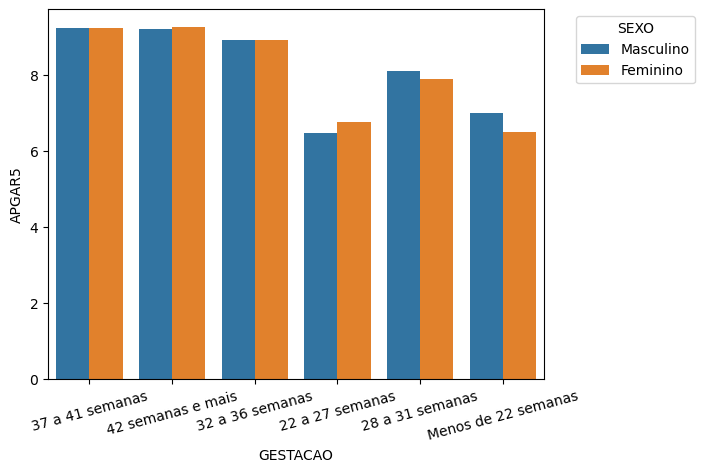

In [176]:
sns.barplot(x = 'GESTACAO'
           ,y = 'APGAR5'
           ,hue = 'SEXO'
           ,data = df_sinasc
            ,errorbar = None
            )
plt.xticks(rotation=15)
plt.legend(title='SEXO', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [59]:
freq_cross = pd.crosstab(df_sinasc['GESTACAO'] , df_sinasc['APGAR5'])
freq_cross

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [60]:
freq_cross.sum(axis=1) #somando conteúdo das colunas.

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [61]:
freq_pct = freq_cross.div(freq_cross.sum(axis = 1) , axis = 0) #Transformando todos os itens em porcentagem.
freq_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [62]:
freq_pct.sum(axis = 1) #conferindo se os valores somam 1

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

In [63]:
freq_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1000x600 with 0 Axes>

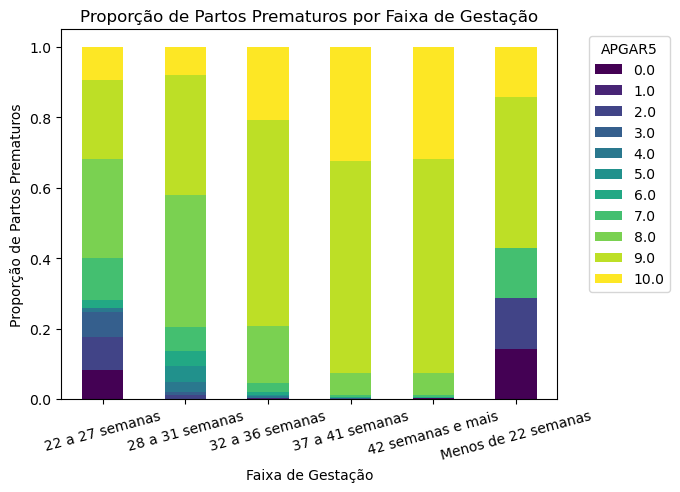

In [177]:
plt.figure(figsize=(10, 6))
freq_pct.plot(kind='bar' , stacked = True , colormap = 'viridis')

plt.title('Proporção de Partos Prematuros por Faixa de Gestação')
plt.xlabel('Faixa de Gestação')
plt.ylabel('Proporção de Partos Prematuros')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 15)

plt.show()

De acordo com o gráfico acima, os maiores indíces de 'APGAR5' abaixo de 6 estã nas faixas de gestação menores que 37 a 41 semanas, o que corrobora com as afrimações dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

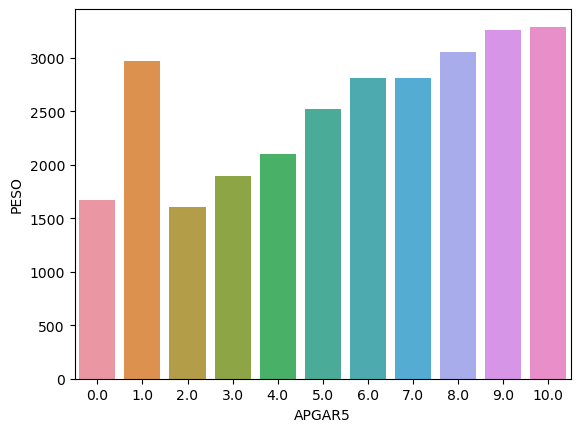

In [169]:
sns.barplot(x = 'APGAR5' , y = 'PESO' , data = df_sinasc , errorbar = None , )